In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
#reading csv file
data=pd.read_csv("D:/MCA/Internship/emp.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.isnull().values.any()

False

In [5]:
# Drop irrelevant columns
data = data[['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']]

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['EducationField'] = label_encoder.fit_transform(data['EducationField'])
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])


In [6]:
#splitting the data into rain and test
x=data.drop("Attrition",axis=1)
y=data['Attrition']

#split the data into training and testing sets
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=40)

In [7]:
lr_model=LogisticRegression(random_state=40,max_iter=1000)
lr_model.fit(x_train,y_train)
lr_prediction =lr_model.predict(x_test)

In [10]:
print("Logistic Regression Accuracy:", accuracy_score(y_test,lr_prediction)*100)
print("LogisticRegression Classification Report:\n",classification_report(y_test,lr_prediction))



Logistic Regression Accuracy: 84.01360544217688
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       0.75      0.06      0.11        49

    accuracy                           0.84       294
   macro avg       0.80      0.53      0.51       294
weighted avg       0.83      0.84      0.78       294



In [11]:
rf_model=RandomForestClassifier(random_state=40)
rf_model.fit(x_train,y_train)
rf_prediction=rf_model.predict(x_test)

In [12]:

print("Random Forest Accuracy:",accuracy_score(y_test, rf_prediction)*100)
print("RandomForest Classification Report: \n",classification_report(y_test,rf_prediction))

Random Forest Accuracy: 84.01360544217688
RandomForest Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.60      0.12      0.20        49

    accuracy                           0.84       294
   macro avg       0.72      0.55      0.56       294
weighted avg       0.81      0.84      0.79       294



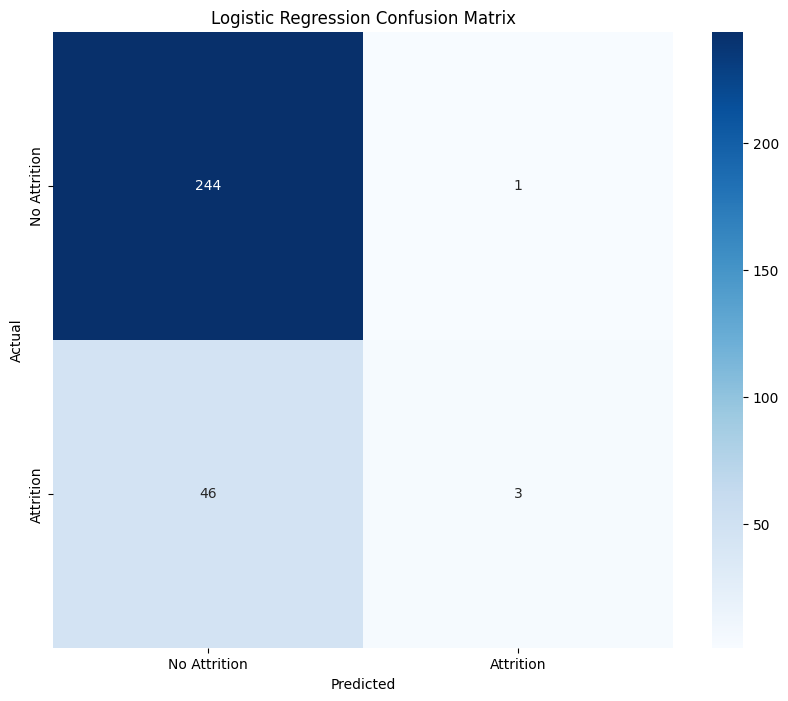

In [13]:
#Confusion Matrix for Logistic Regression
cm=confusion_matrix(y_test,lr_prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()